In [57]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm # import statsmodels
from statsmodels.tsa.arima_model import ARIMA

sns.set(style="whitegrid")

# ignore warnings because they are distracting 
import warnings
warnings.filterwarnings('ignore')

# suppress the scientific notation when printing numpy arrays
np.set_printoptions(suppress=True)

In [63]:
nations = ["US", "CH", "JPN", "UK"]

tables = []

for nation in nations:
    filename = "./data/" + nation + 'data.pickle' 
    with open(filename, 'rb') as handle:
        df = pickle.load(handle)
        tables.append(df)


In [64]:
us, zurich, tokyo, london = tables

In [65]:
ny = us[(us['City'] == 'New York') & (us['Index'] == 'SPX')]

In [66]:
for city in [ny, zurich, tokyo, london]:
    city['Returns %'] = (city['Price Close'] / city['Price Close'].shift(1) -1)*100

In [32]:
def estimate_linear(df, dependent, regressors):
    y = df[dependent]
    X = df[regressors]
    model = sm.OLS(y, X).fit(cov_type='HAC',cov_kwds={'maxlags':10})
    predictions = model.predict(X)
    return model, predictions

In [34]:
def plot_stats(model, name):
    plt.close()
    plt.rc('figure', figsize=(12, 7))
    plt.text(0.01, 0.05, model.summary(), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
    plt.axis('off')
    plt.tight_layout()
    #plt.savefig('images/{}_statistics.png'.format(name))

In [68]:
model, pred = estimate_linear(ny.iloc[1:], 'Returns %', ['Mean Temperature Actual', 'Precipitation Actual', 'Wind Speed Actual', 'Relative Humidity Actual'])

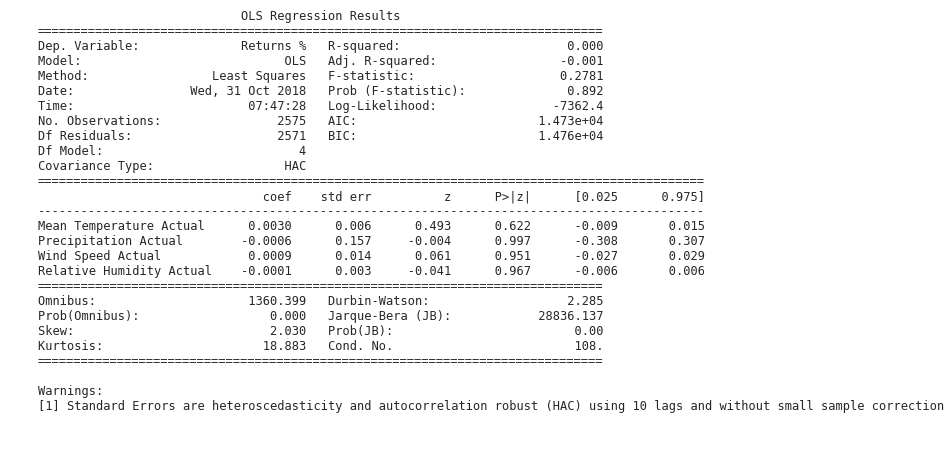

In [69]:
plot_stats(model, '')